In [1]:
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')


In [2]:
vector_df = pd.read_csv('string.csv')
vector_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,0,0.067789,0.020765,-0.004491,0.250960,0.111115,-0.005249,0.009638,-0.075767,-0.197871,...,0.067488,0.025052,0.030540,0.072338,-0.044429,0.273131,-0.158122,0.139052,-0.069191,0.033318
1,1,0.004792,0.030261,-0.008632,0.063302,0.033137,0.014526,0.066054,-0.048545,-0.074909,...,0.065340,0.057708,-0.109409,-0.011422,0.036396,0.208671,-0.095138,0.132329,-0.054984,0.025201
2,2,0.046889,0.131601,-0.007650,-0.009538,-0.020498,0.057649,-0.044796,0.091395,-0.012334,...,0.067721,-0.122000,0.057059,0.105776,-0.065564,-0.053427,-0.078426,0.135370,-0.080725,-0.086688
3,3,-0.084394,0.049396,-0.004048,-0.007828,-0.018294,0.008680,-0.068628,0.008659,0.015411,...,0.051612,0.067043,0.008942,-0.033883,-0.058540,0.461642,-0.128900,0.079898,-0.008860,0.081214
4,4,0.083568,0.239575,-0.004368,-0.035084,0.009118,0.032885,0.036099,0.024062,-0.083493,...,0.046645,-0.015183,-0.030666,0.019176,-0.058193,0.084380,-0.090549,0.092886,-0.060492,-0.026683


In [3]:
sentence1 = ['I am going to buy bitcoin']
sentence2 = ['bitcoin is going to the moon']
sentence3 = ['bitcoin is going down']
sentence4 = ['there is turbulence in the market']
sentence5 = ['Price of bitcoin is volatile']

embed1 = model.encode(sentence1)
embed2 = model.encode(sentence2)
embed3 = model.encode(sentence3)
embed4 = model.encode(sentence4)
embed5 = model.encode(sentence5)

In [4]:
from scipy.spatial import distance


In [8]:
cosine_list = []

for t in range(256):
    content_list = []
    content = np.array(vector_df.iloc[t,1:])
    cos1 = distance.cosine(content,embed1)
    content_list.append(cos1)
    cos2 = distance.cosine(content,embed2)
    content_list.append(cos2)
    cos3 = distance.cosine(content,embed3)
    content_list.append(cos3)
    cos4 = distance.cosine(content,embed4)
    content_list.append(cos4)
    cos5 = distance.cosine(content,embed5)
    content_list.append(cos5)
    cosine_list.append(content_list)

cosine_df = pd.DataFrame(cosine_list)
cosine_df.to_csv('cosine.csv')


In [18]:
cosine_df = pd.read_csv('cosine.csv')
id_df = pd.read_csv('sub_list.csv')
id_df.iloc[:,0] = pd.to_datetime(id_df.iloc[:,0]).dt.date
date = list(id_df.iloc[:,0])
print(date)
#cosine_df['date'] = date
#cosine_df = cosine_df.drop_duplicates(subset=['date'])
#cosine_df.to_csv('cosine2.csv')

BTC_price = pd.read_csv('Coinbase_BTCUSD_dailydata.csv')
BTC_price.date = pd.to_datetime(BTC_price.date).dt.date
price = BTC_price.loc[BTC_price.date.isin(date),['close','date']]
print(price)
print(cosine_df)
#indicator = np.array(cosine_df.iloc[:,1])




[datetime.date(2021, 1, 1), datetime.date(2021, 1, 2), datetime.date(2021, 1, 3), datetime.date(2021, 1, 4), datetime.date(2021, 1, 5), datetime.date(2021, 1, 6), datetime.date(2021, 1, 7), datetime.date(2021, 1, 8), datetime.date(2021, 1, 9), datetime.date(2021, 1, 10), datetime.date(2021, 1, 11), datetime.date(2021, 1, 12), datetime.date(2021, 1, 13), datetime.date(2021, 1, 14), datetime.date(2021, 1, 15), datetime.date(2021, 1, 16), datetime.date(2021, 1, 17), datetime.date(2021, 1, 18), datetime.date(2021, 1, 19), datetime.date(2021, 1, 20), datetime.date(2021, 1, 21), datetime.date(2021, 1, 22), datetime.date(2021, 1, 23), datetime.date(2021, 1, 24), datetime.date(2021, 1, 25), datetime.date(2021, 1, 26), datetime.date(2021, 1, 27), datetime.date(2021, 1, 28), datetime.date(2021, 1, 29), datetime.date(2021, 1, 31), datetime.date(2021, 2, 1), datetime.date(2021, 2, 2), datetime.date(2021, 2, 3), datetime.date(2021, 2, 4), datetime.date(2021, 2, 7), datetime.date(2021, 2, 8), dateti

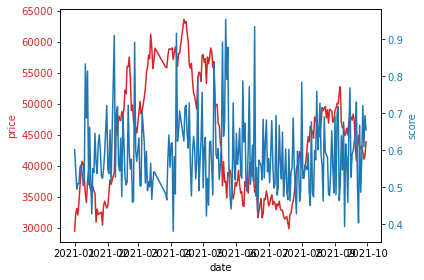

In [20]:
import matplotlib.pyplot as plt

# Create some mock data
t = np.array(price.date)
data1 = np.array(price.close)
data2 = np.array(cosine_df.iloc[:,2])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('price', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
